In [1]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import torch 
from scipy import signal 
from configparser import ConfigParser
from sklearn import preprocessing 

In [2]:
# Read in CSV file
Spectra_df = pd.read_csv('new_unprocessed_data.csv')
Spectra_df.set_index("Raman_shift", inplace=True)
print(Spectra_df.head(10))

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
#print(torch.cuda.get_device_name(torch.cuda.current_device()))

             mixture  mixture.1  mixture.2  mixture.3  mixture.4  mixture.5  \
Raman_shift                                                                   
642.237        39604      39481      39377      39019      38809      38833   
643.118        39302      39293      39311      39005      38937      38841   
643.999        39602      39573      39207      39356      39052      38761   
644.879        39528      39671      39391      39179      38780      38706   
645.760        39744      39777      39473      38941      39056      39111   
646.641        39896      39988      39807      39226      39088      38958   
647.521        39948      39701      39657      39395      38908      38878   
648.401        40188      39935      39895      39741      39439      39120   
649.281        40074      40212      39913      39709      39611      39222   
650.161        40157      40097      39977      39697      39486      39509   

             mixture.6  mixture.7  mixture.8  mixtu

In [3]:
def snv(X):
    """Apply SNV normalization to a Pandas Series (column)."""
    mean = X.mean()
    std_dev = X.std()
    return (X- mean) / std_dev

def min_max(X): 

    """" Apply  the min-max scaling  for the normalization"""

    min = np.min(X , axis = 0)
    max = np.max(X, axis = 0)
    x_normalized = (X -min)/ (max - min )
    return x_normalized

def perform_tsne(X, n_components=3, perplexity =30):
    """
    Apply t-SNE to the dataset and plot the result.

    Parameters:
    - X: The high-dimensional data.
    - n_components: The dimension of the embedded space (default 2).
    - perplexity: The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50.

    Returns:
    - X_tsne: The dataset transformed into the embedded space.
    """

    # Apply t-SNE to the data
    tsne = TSNE(n_components=n_components, perplexity= perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    return X_tsne

def perform_pca(X, n_components = 2): 


    # Apply PCA to the data
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)


    return X_pca


In [4]:
Spectra_df.tail(30)

,mixture,mixture.1,mixture.2,mixture.3,mixture.4,mixture.5,mixture.6,mixture.7,mixture.8,mixture.9,...,olivine.990,olivine.991,olivine.992,olivine.993,olivine.994,olivine.995,olivine.996,olivine.997,olivine.998,olivine.999
Raman_shift,,,,,,,,,,,,,,,,,,,,,
1681.224,60161,60337,60507,59914,59839,59418,59367,59549,59174,58993,...,10080,10190,9996,10093,10079,9973,9955,10196,9984,10002
1681.936,60679,60107,60188,60089,59623,59694,59376,59231,58857,59093,...,10149,10003,9971,10029,10165,10015,10027,10060,10092,10122
1682.648,60455,60243,60234,59682,59578,59405,59273,59402,59098,59222,...,10160,10019,10050,10025,9983,10000,9959,10017,9977,10076
1683.360,60423,60620,60163,59678,59623,59587,59599,59427,59264,59291,...,9908,10015,10017,10174,10066,9998,10001,10161,9965,9976
1684.071,60408,60484,60003,59594,59521,59332,59652,59498,59355,59227,...,10068,10043,10110,9993,10120,10089,10053,10131,10029,9979
1684.783,60552,60471,60161,59678,59669,59486,59896,59408,59440,59032,...,10184,10078,10025,10211,9943,10018,10049,10036,10057,10068
1685.494,60472,60377,60199,59978,59638,59670,59304,59350,59122,59315,...,10047,10126,10021,10018,10205,10042,10030,9931,9975,10074
1686.206,60368,60631,60169,59854,60084,59604,59561,59226,59139,58965,...,9994,9961,10043,9924,9975,10074,9958,9926,9989,9963
1686.917,60515,60532,59978,60016,59865,59280,59493,59521,59167,59017,...,10086,10001,10070,10059,9931,9990,9964,9945,10067,9992


In [5]:
print(Spectra_df.columns)

Index(['mixture', 'mixture.1', 'mixture.2', 'mixture.3', 'mixture.4',
       'mixture.5', 'mixture.6', 'mixture.7', 'mixture.8', 'mixture.9',
       ...
       'olivine.990', 'olivine.991', 'olivine.992', 'olivine.993',
       'olivine.994', 'olivine.995', 'olivine.996', 'olivine.997',
       'olivine.998', 'olivine.999'],
      dtype='object', length=4000)


In [6]:
dataarray = {}
for column_name in Spectra_df.columns:
    Spectra_df[column_name] = Spectra_df[column_name].astype(float)
    min_max_col = min_max(Spectra_df[column_name])
    """print(f"Spectra Column min_max: {min_max_col}")
    X_tsne = perform_tsne(min_max_col)
    print(f"Spectra Column tsne: {X_tsne}")
    x_pca = perform_pca(min_max_col)
    """
    Spectra_df[column_name] = min_max_col
    
    

In [7]:
Spectra_df

,mixture,mixture.1,mixture.2,mixture.3,mixture.4,mixture.5,mixture.6,mixture.7,mixture.8,mixture.9,...,olivine.990,olivine.991,olivine.992,olivine.993,olivine.994,olivine.995,olivine.996,olivine.997,olivine.998,olivine.999
Raman_shift,,,,,,,,,,,,,,,,,,,,,
642.237,0.006212,0.003831,0.003485,0.001611,0.000594,0.002618,0.000000,0.001150,0.002144,0.001746,...,0.409864,0.414638,0.406223,0.432307,0.420094,0.403724,0.415043,0.403481,0.421259,0.413514
643.118,0.000000,0.000000,0.002132,0.001322,0.003215,0.002782,0.005282,0.000000,0.000347,0.000924,...,0.396885,0.411078,0.404216,0.418361,0.420828,0.392610,0.406017,0.420606,0.409078,0.423332
643.999,0.006170,0.005706,0.000000,0.008570,0.005569,0.001134,0.004709,0.005649,0.008822,0.000000,...,0.396885,0.417343,0.399197,0.429402,0.403937,0.402714,0.418052,0.408435,0.423724,0.407161
644.879,0.004648,0.007704,0.003772,0.004915,0.000000,0.000000,0.006817,0.002937,0.000000,0.005567,...,0.408278,0.427737,0.407083,0.405142,0.436986,0.411518,0.426074,0.388480,0.414878,0.426798
645.760,0.009091,0.009864,0.005453,0.000000,0.005651,0.008347,0.015313,0.004745,0.003533,0.001233,...,0.419239,0.440980,0.398337,0.425189,0.410840,0.404157,0.395272,0.418058,0.414733,0.416402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698.988,0.435797,0.426295,0.432850,0.432309,0.422961,0.426616,0.425451,0.422057,0.419796,0.423741,...,0.021921,0.027908,0.026814,0.034282,0.013514,0.011403,0.010029,0.037787,0.019577,0.010251
1699.698,0.427220,0.431634,0.427951,0.436233,0.426176,0.423834,0.430180,0.421338,0.428536,0.421789,...,0.034035,0.018083,0.009607,0.020337,0.035106,0.006784,0.000000,0.030993,0.000000,0.026711
1700.406,0.427713,0.430554,0.427705,0.431731,0.424497,0.427152,0.428133,0.429370,0.432090,0.421851,...,0.009518,0.022498,0.024233,0.007844,0.010282,0.004475,0.014756,0.031843,0.020592,0.016171


In [8]:
Spectra_df.shape

(1339, 4000)

In [9]:
rowindex = np.arange(0,1339)

In [10]:
print(rowindex)

[   0    1    2 ... 1336 1337 1338]


In [11]:
mixture_count = 0
gypsum_count = 0
soapstone_count = 0
olivine_count = 0
nonlabel_count = 0
for column in Spectra_df.columns:
    if column[0:7] == "mixture": mixture_count+=1
    elif column[0:6] == "gypsum": gypsum_count+=1
    elif column[0:7] == "olivine": olivine_count+=1
    elif  column[0:9] == "soapstone": soapstone_count+=1
    else: nonlabel_count+=1
print(f"Mixture count: {mixture_count}")
print(f"Gypsum count: {gypsum_count}")
print(f"Soapstone count: {soapstone_count}")
print(f"Olivine count: {olivine_count}")
print(f"Nonlabel count: {nonlabel_count}")


Mixture count: 1000
Gypsum count: 1000
Soapstone count: 1000
Olivine count: 1000
Nonlabel count: 0


In [12]:
Spectra_df.columns

Index(['mixture', 'mixture.1', 'mixture.2', 'mixture.3', 'mixture.4',
       'mixture.5', 'mixture.6', 'mixture.7', 'mixture.8', 'mixture.9',
       ...
       'olivine.990', 'olivine.991', 'olivine.992', 'olivine.993',
       'olivine.994', 'olivine.995', 'olivine.996', 'olivine.997',
       'olivine.998', 'olivine.999'],
      dtype='object', length=4000)

In [13]:
Spectra_df

,mixture,mixture.1,mixture.2,mixture.3,mixture.4,mixture.5,mixture.6,mixture.7,mixture.8,mixture.9,...,olivine.990,olivine.991,olivine.992,olivine.993,olivine.994,olivine.995,olivine.996,olivine.997,olivine.998,olivine.999
Raman_shift,,,,,,,,,,,,,,,,,,,,,
642.237,0.006212,0.003831,0.003485,0.001611,0.000594,0.002618,0.000000,0.001150,0.002144,0.001746,...,0.409864,0.414638,0.406223,0.432307,0.420094,0.403724,0.415043,0.403481,0.421259,0.413514
643.118,0.000000,0.000000,0.002132,0.001322,0.003215,0.002782,0.005282,0.000000,0.000347,0.000924,...,0.396885,0.411078,0.404216,0.418361,0.420828,0.392610,0.406017,0.420606,0.409078,0.423332
643.999,0.006170,0.005706,0.000000,0.008570,0.005569,0.001134,0.004709,0.005649,0.008822,0.000000,...,0.396885,0.417343,0.399197,0.429402,0.403937,0.402714,0.418052,0.408435,0.423724,0.407161
644.879,0.004648,0.007704,0.003772,0.004915,0.000000,0.000000,0.006817,0.002937,0.000000,0.005567,...,0.408278,0.427737,0.407083,0.405142,0.436986,0.411518,0.426074,0.388480,0.414878,0.426798
645.760,0.009091,0.009864,0.005453,0.000000,0.005651,0.008347,0.015313,0.004745,0.003533,0.001233,...,0.419239,0.440980,0.398337,0.425189,0.410840,0.404157,0.395272,0.418058,0.414733,0.416402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698.988,0.435797,0.426295,0.432850,0.432309,0.422961,0.426616,0.425451,0.422057,0.419796,0.423741,...,0.021921,0.027908,0.026814,0.034282,0.013514,0.011403,0.010029,0.037787,0.019577,0.010251
1699.698,0.427220,0.431634,0.427951,0.436233,0.426176,0.423834,0.430180,0.421338,0.428536,0.421789,...,0.034035,0.018083,0.009607,0.020337,0.035106,0.006784,0.000000,0.030993,0.000000,0.026711
1700.406,0.427713,0.430554,0.427705,0.431731,0.424497,0.427152,0.428133,0.429370,0.432090,0.421851,...,0.009518,0.022498,0.024233,0.007844,0.010282,0.004475,0.014756,0.031843,0.020592,0.016171


In [14]:
selected = Spectra_df.filter(regex=r'^mixture(\.\d+)?$')
selected

,mixture,mixture.1,mixture.2,mixture.3,mixture.4,mixture.5,mixture.6,mixture.7,mixture.8,mixture.9,...,mixture.990,mixture.991,mixture.992,mixture.993,mixture.994,mixture.995,mixture.996,mixture.997,mixture.998,mixture.999
Raman_shift,,,,,,,,,,,,,,,,,,,,,
642.237,0.006212,0.003831,0.003485,0.001611,0.000594,0.002618,0.000000,0.001150,0.002144,0.001746,...,0.001436,0.001384,0.002494,0.001569,0.000835,0.001922,0.001168,0.000000,0.002306,0.002829
643.118,0.000000,0.000000,0.002132,0.001322,0.003215,0.002782,0.005282,0.000000,0.000347,0.000924,...,0.000039,0.002327,0.000953,0.000480,0.001867,0.000366,0.000792,0.001772,0.002371,0.000685
643.999,0.006170,0.005706,0.000000,0.008570,0.005569,0.001134,0.004709,0.005649,0.008822,0.000000,...,0.000556,0.000465,0.002141,0.002087,0.000483,0.000732,0.000143,0.001902,0.000000,0.001628
644.879,0.004648,0.007704,0.003772,0.004915,0.000000,0.000000,0.006817,0.002937,0.000000,0.005567,...,0.001410,0.000983,0.002037,0.002048,0.001841,0.002262,0.001311,0.000482,0.001257,0.000000
645.760,0.009091,0.009864,0.005453,0.000000,0.005651,0.008347,0.015313,0.004745,0.003533,0.001233,...,0.000000,0.000000,0.000000,0.000000,0.000901,0.000444,0.000000,0.002319,0.000985,0.000388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698.988,0.435797,0.426295,0.432850,0.432309,0.422961,0.426616,0.425451,0.422057,0.419796,0.423741,...,0.015964,0.014844,0.017340,0.015998,0.015103,0.016105,0.014839,0.016560,0.015909,0.014312
1699.698,0.427220,0.431634,0.427951,0.436233,0.426176,0.423834,0.430180,0.421338,0.428536,0.421789,...,0.015097,0.015762,0.016700,0.014598,0.015651,0.013792,0.016176,0.014997,0.013940,0.015139
1700.406,0.427713,0.430554,0.427705,0.431731,0.424497,0.427152,0.428133,0.429370,0.432090,0.421851,...,0.012936,0.015581,0.016217,0.016957,0.016395,0.014785,0.016163,0.014684,0.016764,0.014777


## Plot the Mixture Training Data and the Component Labels

1000


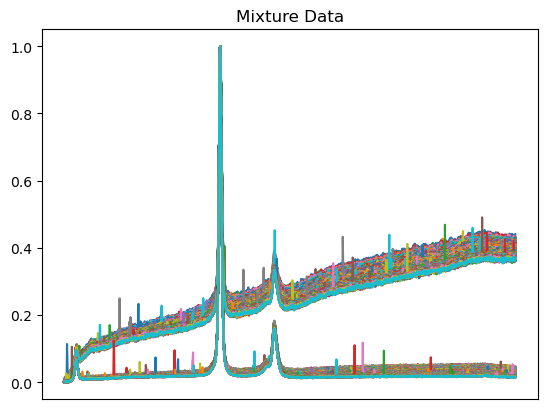

In [15]:
plt.plot(Spectra_df.filter(regex=r'^mixture(\.\d+)?$'))
plt.title("Mixture Data")
plt.xticks([])
print(len(Spectra_df.filter(regex=r'^mixture(\.\d+)?$').columns))

4000


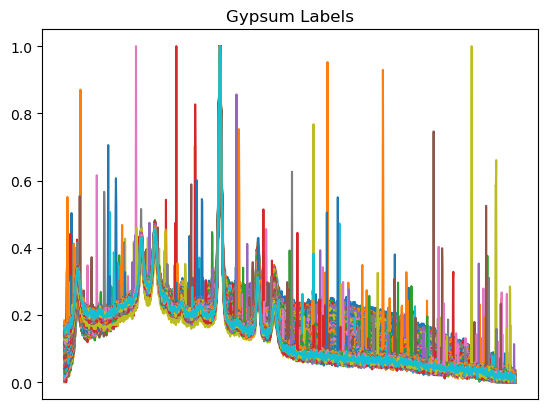

In [16]:
plt.plot(Spectra_df.filter(regex=r'^gypsum(\.\d+)?$'))
plt.title("Gypsum Labels")
plt.xticks([])
print(len(Spectra_df.columns))

4000


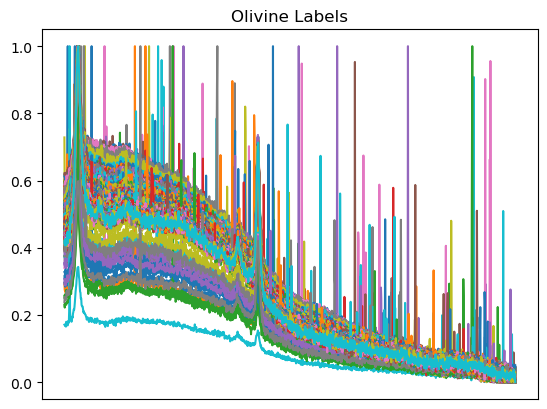

In [17]:
plt.plot(Spectra_df.filter(regex=r'^olivine(\.\d+)?$'))
plt.title("Olivine Labels")
plt.xticks([])
print(len(Spectra_df.columns))

4000


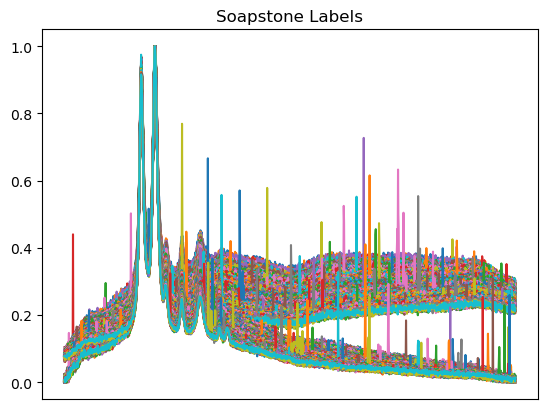

In [19]:
plt.plot(Spectra_df.filter(regex=r'^soapstone(\.\d+)?$'))
plt.title("Soapstone Labels")
plt.xticks([])
print(len(Spectra_df.columns))


In [20]:
soapstone_data = Spectra_df.filter(regex=r'^soapstone(\.\d+)?$').to_numpy()
print(soapstone_data)

[[0.0018214  0.01389647 0.00735733 ... 0.07695662 0.07339298 0.07829513]
 [0.         0.00992605 0.         ... 0.07592108 0.0766512  0.08004596]
 [0.01752486 0.         0.00710877 ... 0.07319599 0.06626905 0.07807627]
 ...
 [0.28330216 0.26810264 0.27589978 ... 0.00926532 0.00828363 0.01351425]
 [0.27193069 0.2691945  0.28683635 ... 0.00267059 0.00143583 0.00311867]
 [0.27882249 0.27480272 0.28226288 ... 0.         0.00436271 0.011271  ]]


In [21]:
mixture_data = Spectra_df.filter(regex=r'^mixture(\.\d+)?$').to_numpy()
print(f"Mixture shape: {mixture_data.T.shape}")

Mixture shape: (1000, 1339)


In [22]:
from sklearn.model_selection import train_test_split
mixture_data = Spectra_df.filter(regex=r'^mixture(\.\d+)?$').to_numpy()
print(f"Mixture shape: {mixture_data.shape}")
# Columns = Samples
# Rows = Intensity at raman_shift
# Read Test Data csv
Test_df = pd.read_csv('COSC525_Data1.csv')
Test_df.columns = Test_df.iloc[0]
Test_df = Test_df.drop(0)
Test_df.set_index("Raman_shifts", inplace=True)
#print(Test_df.head(10))

soapstone_data = Spectra_df.filter(regex=r'^soapstone(\.\d+)?$').to_numpy()
olivine_data = Spectra_df.filter(regex=r'^olivine(\.\d+)?$').to_numpy()
gypsum_data = Spectra_df.filter(regex=r'^gypsum(\.\d+)?$').to_numpy()
test_data = Test_df["nonLabel"].to_numpy()
print(f"Soapstone shape: {soapstone_data.shape}")

mixture_train, mixture_val, soapstone_train, soapstone_val, olivine_train, olivine_val,\
    gypsum_train, gypsum_val = train_test_split(mixture_data.T, soapstone_data.T, olivine_data.T, \
                                                gypsum_data.T, test_size=0.2, random_state=42)
print(f"Mixture train shape: {mixture_train.shape}")

train_data = np.zeros((4, mixture_train.shape[1], mixture_train.shape[0]))
train_data[0] = mixture_train.T
train_data[1] = soapstone_train.T
train_data[2] = olivine_train.T
train_data[3] = gypsum_train.T

val_data = np.zeros((4, mixture_train.shape[1], mixture_val.shape[0]))
val_data[0] = mixture_val.T
val_data[1] = soapstone_val.T
val_data[2] = olivine_val.T
val_data[3] = gypsum_val.T

# Print all of the val data and train data shapes
for i in range(4):
    print(f"Train data shape: {train_data[i].shape}")
    print(f"Val data shape: {val_data[i].shape}")


Mixture shape: (1339, 1000)
Soapstone shape: (1339, 1000)
Mixture train shape: (800, 1339)
Train data shape: (1339, 800)
Val data shape: (1339, 200)
Train data shape: (1339, 800)
Val data shape: (1339, 200)
Train data shape: (1339, 800)
Val data shape: (1339, 200)
Train data shape: (1339, 800)
Val data shape: (1339, 200)


## Model BluePrint

In [23]:
import torch
import torch.nn as nn
from torch.nn import Module, Sequential
from torch.nn import functional as func


__all__ = ['PreprocessUnit', 'ExtractorUnit', 'SENN']

class PreprocessUnit(Module):
    def __init__(self):
        super(PreprocessUnit, self).__init__()
        self.preprocess = Sequential(
                                    nn.Conv1d(1, 6, 3, padding=1),
                                    nn.BatchNorm1d(6),
                                    nn.ReLU(),
                                    nn.Conv1d(6, 12, 3, padding=1),
                                    nn.BatchNorm1d(12),
                                    nn.ReLU()
                                )

    def forward(self, spectra):
        return self.preprocess(spectra)


class ExtractorUnit(Module):
    def __init__(self, linearSize):
        super(ExtractorUnit, self).__init__()
        self.extractor = Sequential(
                                    nn.Conv1d(12, 6, 3, padding=1),
                                    nn.BatchNorm1d(6),
                                    nn.ReLU(),
                                    nn.Conv1d(6, 1, 3, padding=1),
                                    nn.BatchNorm1d(1),
                                    nn.ReLU(),
                                    nn.Linear(linearSize, linearSize, bias=True),
                                    nn.Sigmoid()
                                )

    def forward(self, spectra):
        return self.extractor(spectra)


class  SENN(Module):
    def __init__(self, preprocessUnit: Module, *extractors):
        super(SENN, self).__init__()
        self.preprocessUnit = preprocessUnit
        self.extractors = extractors
    
        # Check for CUDA availability and move the model to GPU if available
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)



    def forward(self, spectrum):
        latentVar = self.preprocessUnit(spectrum.to(self.device))
        components = []
        for extractor in self.extractors:
            components.append(extractor(latentVar))
        return components

In [24]:
def fit_SENN(model, train_data, val_data, criterion, optimizers, comment, epochs=3):
    PRINT_TEMPLATE = '\tEpoch {}/{}: training loss: {:.4f}/{:.4f}/{:.4f} (SOAP/OLIV/GYP); ' + \
                        'train similarity: {:.4f}/{:.4f}/{:.4f} (SOAP/OLIV/GYP); ' + \
                        'validation loss: {:.4f}/{:.4f}/{:.4f} (SOAP/OLIV/GYP); ' + \
                        'validation similarity: {:.4f}/{:.4f}/{:.4f} (SOAP/OLIV/GYP)'
    train_soapstone_loss_record = np.zeros(epochs, dtype=np.float64)
    train_soapstone_similarity_record = np.zeros(epochs, dtype=np.float64)
    train_olivine_loss_record = np.zeros(epochs, dtype=np.float64)
    train_olivine_similarity_record = np.zeros(epochs, dtype=np.float64)
    train_gypsum_loss_record = np.zeros(epochs, dtype=np.float64)
    train_gypsum_similarity_record = np.zeros(epochs, dtype=np.float64)
    val_soapstone_loss_record = np.zeros(epochs, dtype=np.float64)
    val_soapstone_similarity_record = np.zeros(epochs, dtype=np.float64)
    val_olivine_loss_record = np.zeros(epochs, dtype=np.float64)
    val_olivine_similarity_record = np.zeros(epochs, dtype=np.float64)
    val_gypsum_loss_record = np.zeros(epochs, dtype=np.float64)
    val_gypsum_similarity_record = np.zeros(epochs, dtype=np.float64)
    
    for epoch in range(epochs):
        soapstone_train_loss = 0
        olivine_train_loss = 0
        gypsum_train_loss = 0
        soapstone_train_similarity = torch.tensor(0.0, device=device)
        olivine_train_similarity = torch.tensor(0.0, device=device)
        gypsum_train_similarity = torch.tensor(0.0, device=device)
        train_set_length = 0
        
        for i_m in range(len(model)):
            model[i_m] = model[i_m].to(device)
        
        for i_m in range(len(model)):
            model[i_m].train()
        ## Loop through training samples
        for i in range(train_data.shape[2]): 
            mixture = torch.from_numpy(train_data[0, :, i]).float().unsqueeze(0).unsqueeze(0).to(device)
            soapstone = torch.from_numpy(train_data[1, :, i]).float().to(device)
            olivine = torch.from_numpy(train_data[2, :, i]).float().to(device)
            gypsum = torch.from_numpy(train_data[3, :, i]).float().to(device)
            
            for i_o in range(len(optimizers)):
                optimizers[i_o].zero_grad()
            
            predict_soapstone = model[1](model[0](mixture))
            predict_olivine = model[2](model[0](mixture))
            predict_gypsum = model[3](model[0](mixture))
            soapstone_loss = criterion[0](predict_soapstone.squeeze(1), soapstone.unsqueeze(0))
            olivine_loss = criterion[1](predict_olivine.squeeze(1), olivine.unsqueeze(0))
            gypsum_loss = criterion[2](predict_gypsum.squeeze(1), gypsum.unsqueeze(0))
            soapstone_train_loss += soapstone_loss
            olivine_train_loss += olivine_loss
            gypsum_train_loss += gypsum_loss
            soapstone_similarity = comment(predict_soapstone.squeeze(1), soapstone)
            olivine_similarity = comment(predict_olivine.squeeze(1), olivine)
            gypsum_similarity = comment(predict_gypsum.squeeze(1), gypsum)
            soapstone_train_similarity += torch.abs(torch.sum(soapstone_similarity.detach()))
            olivine_train_similarity += torch.abs(torch.sum(olivine_similarity.detach()))
            gypsum_train_similarity += torch.abs(torch.sum(gypsum_similarity.detach()))

            soapstone_loss.backward()
            olivine_loss.backward()
            gypsum_loss.backward()
            train_set_length += 1
            for i_opt in range(3):
                optimizers[i_opt].step()
        # Evaluate the Validation Set for Model at the end of each epoch
        for i_m in range(len(model)):
            model[i_m].eval()
        val_soapstone_loss = 0
        val_olivine_loss = 0
        val_gypsum_loss = 0
        val_soapstone_similarity =  torch.tensor(0.0, device=device)
        val_olivine_similarity =  torch.tensor(0.0, device=device)
        val_gypsum_similarity =  torch.tensor(0.0, device=device)
        val_set_length = 0
        with torch.no_grad():
            for i in range(val_data.shape[2]):
                mixture_val = torch.from_numpy(val_data[0, :, i]).float().unsqueeze(0).unsqueeze(0).to(device)
                soapstone_val = torch.from_numpy(val_data[1, :, i]).float().to(device)
                olivine_val = torch.from_numpy(val_data[2, :, i]).float().to(device)
                gypsum_val = torch.from_numpy(val_data[3, :, i]).float().to(device)
                predict_soapstone_val = model[1](model[0](mixture_val))
                predict_olivine_val = model[2](model[0](mixture_val))
                predict_gypsum_val = model[3](model[0](mixture_val))
                soapstone_loss_val = criterion[0](predict_soapstone_val.squeeze(1), soapstone_val.unsqueeze(0))
                olivine_loss_val = criterion[1](predict_olivine_val.squeeze(1), olivine_val.unsqueeze(0))
                gypsum_loss_val = criterion[2](predict_gypsum_val.squeeze(1), gypsum_val.unsqueeze(0))
                val_soapstone_loss += soapstone_loss_val
                val_olivine_loss += olivine_loss_val
                val_gypsum_loss += gypsum_loss_val
                soapstone_similarity_val = comment(predict_soapstone_val.squeeze(1), soapstone_val)
                olivine_similarity_val = comment(predict_olivine_val.squeeze(1), olivine_val)
                gypsum_similarity_val = comment(predict_gypsum_val.squeeze(1), gypsum_val)
                val_soapstone_similarity += torch.abs(torch.sum(soapstone_similarity_val.detach()))
                val_olivine_similarity += torch.abs(torch.sum(olivine_similarity_val.detach()))
                val_gypsum_similarity += torch.abs(torch.sum(gypsum_similarity_val.detach()))

                val_set_length += 1

        train_soapstone_loss_record[epoch] = soapstone_train_loss
        train_olivine_loss_record[epoch] = olivine_train_loss
        train_gypsum_loss_record[epoch] = gypsum_train_loss
        train_soapstone_similarity_record[epoch] = soapstone_train_similarity / train_set_length
        train_olivine_similarity_record[epoch] = olivine_train_similarity / train_set_length
        train_gypsum_similarity_record[epoch] = gypsum_train_similarity / train_set_length
        val_soapstone_loss_record[epoch] = val_soapstone_loss
        val_olivine_loss_record[epoch] = val_olivine_loss
        val_gypsum_loss_record[epoch] = val_gypsum_loss
        val_soapstone_similarity_record[epoch] = val_soapstone_similarity / val_set_length
        val_olivine_similarity_record[epoch] = val_olivine_similarity / val_set_length
        val_gypsum_similarity_record[epoch] = val_gypsum_similarity / val_set_length

        print(PRINT_TEMPLATE.format(epoch + 1, epochs, train_soapstone_loss_record[epoch], train_olivine_loss_record[epoch], train_gypsum_loss_record[epoch],
                                    train_soapstone_similarity_record[epoch], train_olivine_similarity_record[epoch], train_gypsum_similarity_record[epoch], 
                                    val_soapstone_loss_record[epoch], val_olivine_loss_record[epoch], val_gypsum_loss_record[epoch], val_soapstone_similarity_record[epoch],
                                    val_olivine_similarity_record[epoch], val_gypsum_similarity_record[epoch]))
    return {'model': model,
            'soapstone_loss': train_soapstone_loss_record,
            'olivine_loss': train_olivine_loss_record,
            'gypsum_loss': train_gypsum_loss_record,
            'soapstone_simi': train_soapstone_similarity_record,
            'olivine_simi': train_olivine_similarity_record,
            'gypsum_simi': train_gypsum_similarity_record,
            'val_soapstone_loss': val_soapstone_loss_record,
            'val_olivine_loss': val_olivine_loss_record,
            'val_gypsum_loss': val_gypsum_loss_record,
            'val_soapstone_simi': val_soapstone_similarity_record,
            'val_olivine_simi': val_olivine_similarity_record,
            'val_gypsum_simi': val_gypsum_similarity_record}


In [25]:
import torch.nn as nn
import torch.optim as opt

modules = [
    PreprocessUnit().to(device),
    ExtractorUnit(train_data.shape[1]).to(device),
    ExtractorUnit(train_data.shape[1]).to(device),
    ExtractorUnit(train_data.shape[1]).to(device),
]
# losses
criterions = [
    nn.MSELoss(),
    nn.MSELoss(),
    nn.MSELoss()
]
# config optimizer and learning rate
optimizers = [
    opt.Adam([{'params': modules[1].parameters()}, {'params':modules[0].parameters()}], 0.0001),
    opt.Adam(modules[2].parameters(), 0.0001),
    opt.Adam(modules[3].parameters(), 0.0001)
]
# evaluate result
comment = nn.CosineSimilarity()

In [41]:
print(f"{'Start training model!':=^100s}")
tape = fit_SENN(modules, train_data,val_data, criterions, optimizers, comment, epochs=150)

=======================================Start training model!========================================
	Epoch 1/150: training loss: 0.0331/0.1572/0.0418 (SOAP/OLIV/GYP); train similarity: 0.9997/0.9997/0.9993 (SOAP/OLIV/GYP); validation loss: 1.9175/4.8103/1.2294 (SOAP/OLIV/GYP); validation similarity: 0.9226/0.9465/0.9070 (SOAP/OLIV/GYP)
	Epoch 2/150: training loss: 0.0322/0.1513/0.0408 (SOAP/OLIV/GYP); train similarity: 0.9997/0.9997/0.9993 (SOAP/OLIV/GYP); validation loss: 1.9438/4.8441/1.1910 (SOAP/OLIV/GYP); validation similarity: 0.9217/0.9466/0.9105 (SOAP/OLIV/GYP)
	Epoch 3/150: training loss: 0.0313/0.1456/0.0399 (SOAP/OLIV/GYP); train similarity: 0.9997/0.9997/0.9993 (SOAP/OLIV/GYP); validation loss: 1.8785/4.8161/1.1478 (SOAP/OLIV/GYP); validation similarity: 0.9247/0.9474/0.9148 (SOAP/OLIV/GYP)
	Epoch 4/150: training loss: 0.0304/0.1396/0.0390 (SOAP/OLIV/GYP); train similarity: 0.9997/0.9997/0.9993 (SOAP/OLIV/GYP); validation loss: 1.7233/4.8419/1.1017 (SOAP/OLIV/GYP); validat

	Epoch 35/150: training loss: 0.0281/0.0656/0.0205 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9998/0.9997 (SOAP/OLIV/GYP); validation loss: 1.4497/4.4595/0.3031 (SOAP/OLIV/GYP); validation similarity: 0.9443/0.9478/0.9824 (SOAP/OLIV/GYP)
	Epoch 36/150: training loss: 0.0278/0.0644/0.0200 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9998/0.9997 (SOAP/OLIV/GYP); validation loss: 1.4798/4.4435/0.2958 (SOAP/OLIV/GYP); validation similarity: 0.9433/0.9484/0.9828 (SOAP/OLIV/GYP)
	Epoch 37/150: training loss: 0.0272/0.0656/0.0198 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9998/0.9997 (SOAP/OLIV/GYP); validation loss: 1.4291/4.5133/0.2861 (SOAP/OLIV/GYP); validation similarity: 0.9453/0.9476/0.9836 (SOAP/OLIV/GYP)
	Epoch 38/150: training loss: 0.0273/0.0674/0.0196 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9998/0.9997 (SOAP/OLIV/GYP); validation loss: 1.4304/4.4736/0.2763 (SOAP/OLIV/GYP); validation similarity: 0.9451/0.9479/0.9843 (SOAP/OLIV/GYP)
	Epoch 39/150: training loss: 0.0268/0.0682/

	Epoch 70/150: training loss: 0.0243/0.0429/0.0160 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9999/0.9997 (SOAP/OLIV/GYP); validation loss: 1.1170/3.9851/0.6803 (SOAP/OLIV/GYP); validation similarity: 0.9570/0.9488/0.9786 (SOAP/OLIV/GYP)
	Epoch 71/150: training loss: 0.0239/0.0421/0.0158 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9999/0.9997 (SOAP/OLIV/GYP); validation loss: 1.1121/3.9496/0.6567 (SOAP/OLIV/GYP); validation similarity: 0.9574/0.9490/0.9792 (SOAP/OLIV/GYP)
	Epoch 72/150: training loss: 0.0240/0.0412/0.0158 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9999/0.9997 (SOAP/OLIV/GYP); validation loss: 1.1117/3.9292/0.6598 (SOAP/OLIV/GYP); validation similarity: 0.9577/0.9492/0.9789 (SOAP/OLIV/GYP)
	Epoch 73/150: training loss: 0.0238/0.0407/0.0156 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9999/0.9997 (SOAP/OLIV/GYP); validation loss: 1.1074/3.8857/0.6589 (SOAP/OLIV/GYP); validation similarity: 0.9581/0.9496/0.9790 (SOAP/OLIV/GYP)
	Epoch 74/150: training loss: 0.0240/0.0405/

	Epoch 105/150: training loss: 0.0236/0.0379/0.0121 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9999/0.9998 (SOAP/OLIV/GYP); validation loss: 1.1176/4.1464/0.6329 (SOAP/OLIV/GYP); validation similarity: 0.9588/0.9514/0.9793 (SOAP/OLIV/GYP)
	Epoch 106/150: training loss: 0.0229/0.0376/0.0120 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9999/0.9998 (SOAP/OLIV/GYP); validation loss: 1.1222/3.9914/0.6244 (SOAP/OLIV/GYP); validation similarity: 0.9587/0.9525/0.9792 (SOAP/OLIV/GYP)
	Epoch 107/150: training loss: 0.0220/0.0382/0.0121 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9999/0.9998 (SOAP/OLIV/GYP); validation loss: 1.1703/4.0559/0.6016 (SOAP/OLIV/GYP); validation similarity: 0.9572/0.9515/0.9795 (SOAP/OLIV/GYP)
	Epoch 108/150: training loss: 0.0214/0.0383/0.0119 (SOAP/OLIV/GYP); train similarity: 0.9998/0.9999/0.9998 (SOAP/OLIV/GYP); validation loss: 1.1544/4.1541/0.5927 (SOAP/OLIV/GYP); validation similarity: 0.9578/0.9506/0.9797 (SOAP/OLIV/GYP)
	Epoch 109/150: training loss: 0.0213/0.

	Epoch 140/150: training loss: 0.0211/0.0319/0.0137 (SOAP/OLIV/GYP); train similarity: 0.9999/0.9999/0.9998 (SOAP/OLIV/GYP); validation loss: 0.9903/4.8411/0.6415 (SOAP/OLIV/GYP); validation similarity: 0.9641/0.9476/0.9798 (SOAP/OLIV/GYP)
	Epoch 141/150: training loss: 0.0198/0.0341/0.0131 (SOAP/OLIV/GYP); train similarity: 0.9999/0.9999/0.9998 (SOAP/OLIV/GYP); validation loss: 1.0516/4.6613/0.6430 (SOAP/OLIV/GYP); validation similarity: 0.9610/0.9508/0.9799 (SOAP/OLIV/GYP)
	Epoch 142/150: training loss: 0.0193/0.0364/0.0125 (SOAP/OLIV/GYP); train similarity: 0.9999/0.9999/0.9998 (SOAP/OLIV/GYP); validation loss: 0.9210/4.5858/0.6129 (SOAP/OLIV/GYP); validation similarity: 0.9655/0.9522/0.9805 (SOAP/OLIV/GYP)
	Epoch 143/150: training loss: 0.0180/0.0355/0.0119 (SOAP/OLIV/GYP); train similarity: 0.9999/0.9999/0.9998 (SOAP/OLIV/GYP); validation loss: 0.8929/4.4199/0.6190 (SOAP/OLIV/GYP); validation similarity: 0.9663/0.9545/0.9807 (SOAP/OLIV/GYP)
	Epoch 144/150: training loss: 0.0169/0.

In [54]:
def plot_training_loss(tape):
    plt.plot(tape['soapstone_loss'], label='Soapstone', color='red')
    plt.plot(tape['olivine_loss'], label='Olivine', color='green')
    plt.plot(tape['gypsum_loss'], label='Gypsum', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')
    plt.show()

In [55]:
def plot_training_similarity(tape):
    plt.plot(tape['soapstone_simi'], label='Soapstone', color='red')
    plt.plot(tape['olivine_simi'], label='Olivine', color='green')
    plt.plot(tape['gypsum_simi'], label='Gypsum', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Similarity')
    plt.legend()
    plt.title('Training Similarity')
    plt.show()

In [56]:
def plot_validation_loss(tape):
    plt.plot(tape['val_soapstone_loss'], label='Soapstone', color='red')
    plt.plot(tape['val_olivine_loss'], label='Olivine', color='green')
    plt.plot(tape['val_gypsum_loss'], label='Gypsum', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Validation Loss')
    plt.show()
def plot_validation_similarity(tape):
    plt.plot(tape['val_soapstone_simi'], label='Soapstone', color='red')
    plt.plot(tape['val_olivine_simi'], label='Olivine', color='green')
    plt.plot(tape['val_gypsum_simi'], label='Gypsum', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Similarity')
    plt.legend()
    plt.title('Validation Similarity')
    plt.show()

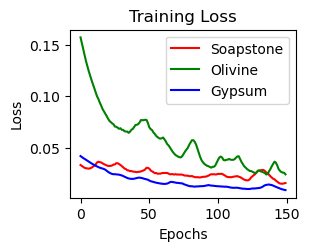

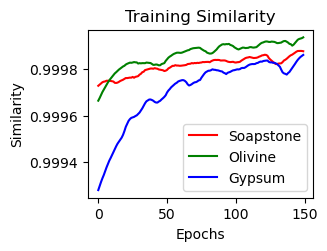

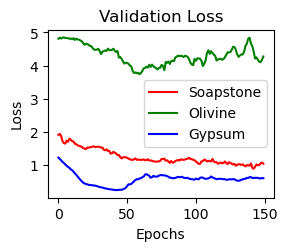

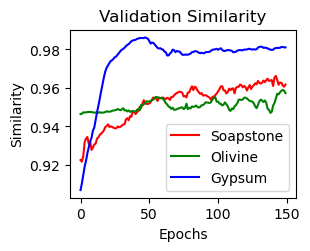

In [57]:
# Plot training loss, training similarity, validation loss, and validation similarity as subplots
plt.subplot(2, 2, 1)
plot_training_loss(tape)
plt.subplot(2, 2, 2)
plot_training_similarity(tape)
plt.subplot(2, 2, 3)
plot_validation_loss(tape)
plt.subplot(2, 2, 4)
plot_validation_similarity(tape)

In [58]:
Test_df = Test_df.apply(pd.to_numeric)
test_data = Test_df["nonLabel"].to_numpy()

In [59]:
print(mixture_val.shape)
mixture_test_data = []
soapstone_predict = []
olivine_predict = []
gypsum_predict = []

modules = [module.to(device) for module in modules]

for i in range(mixture_val.shape[0]):
    # Convert test data to tensor and move it to the same device as the models
    test_spectra = torch.from_numpy(mixture_val[i+1, :]).float().unsqueeze(0).unsqueeze(0).to(device)
    print(f"Test spectra shape: {test_spectra.shape}")
    
    # Append mixture data as numpy array to the list; ensure it's moved to CPU first
    mixture_test_data.append(test_spectra.detach().cpu().numpy())

    # For predictions, ensure the operation is on the correct device, and then move back to CPU for NumPy conversion
    soapstone_pred = modules[1](modules[0](test_spectra)).detach().cpu().numpy()
    soapstone_predict.append(soapstone_pred)
    print(f"Soapstone predict shape: {soapstone_pred.shape}")

    olivine_pred = modules[2](modules[0](test_spectra)).detach().cpu().numpy()
    olivine_predict.append(olivine_pred)
    print(f"Olivine predict shape: {olivine_pred.shape}")

    gypsum_pred = modules[3](modules[0](test_spectra)).detach().cpu().numpy()
    gypsum_predict.append(gypsum_pred)
    print(f"Gypsum predict shape: {gypsum_pred.shape}")
    break
    

(200, 1339)
Test spectra shape: torch.Size([1, 1, 1339])
Soapstone predict shape: (1, 1, 1339)
Olivine predict shape: (1, 1, 1339)
Gypsum predict shape: (1, 1, 1339)


In [60]:
mixture_test_data[-1].shape
mixture_test_data[-1].squeeze(0).shape

(1, 1339)

In [61]:
def plot_testoutput(mixture_test_data, soapstone_predict, olivine_predict, gypsum_predict, index=0):
    plt.figure(figsize=(10, 5))
    plt.plot(mixture_test_data[index].squeeze(0).squeeze(0), label='Mixture', color='black')
    plt.plot(soapstone_predict[index].squeeze(0).squeeze(0), label='Soapstone', color='red')
    plt.plot(olivine_predict[index].squeeze(0).squeeze(0), label='Olivine', color='green')
    plt.plot(gypsum_predict[index].squeeze(0).squeeze(0), label='Gypsum', color='blue')
    plt.xlabel('Raman Shift')
    # need to fix xlim range [640, 1600]
    plt.ylabel('Intensity')
    plt.legend()
    plt.title('Test Output')
    plt.show()

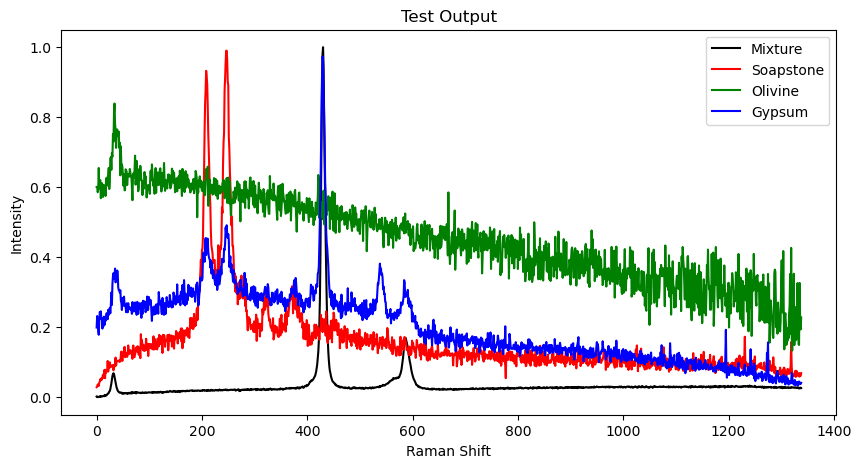

In [62]:
plot_testoutput(mixture_test_data, soapstone_predict, olivine_predict, gypsum_predict)

In [63]:
olivine_val.shape

(200, 1339)

In [64]:
def subplot_spectra(mixture_test_data, soapstone_predict, olivine_predict, gypsum_predict, index=0):
    fig, axs = plt.subplots(4, 2, figsize=(10, 20))
    axs[0][0].plot(mixture_test_data[index].squeeze(0).squeeze(0), label='Mixture', color='black')
    axs[0][0].set_title('Mixture')
    axs[1][0].plot(soapstone_predict[index].squeeze(0).squeeze(0), label='Soapstone', color='red')
    axs[1][0].set_title('Soapstone Prediction')
    axs[1][1].plot(soapstone_val[index], label='Soapstone', color='red')
    axs[1][1].set_title('Soapstone Ground Truth')
    axs[2][0].plot(olivine_predict[index].squeeze(0).squeeze(0), label='Olivine', color='green')
    axs[2][0].set_title('Olivine Prediction')
    axs[2][1].plot(olivine_val[index], label='Olivine', color='green')
    axs[2][1].set_title('Olivine Ground Truth')
    axs[3][0].plot(gypsum_predict[index].squeeze(0).squeeze(0), label='Gypsum', color='blue')
    axs[3][0].set_title('Gypsum Prediction')
    axs[3][1].plot(gypsum_val[index], label='Gypsum', color='blue')
    axs[3][1].set_title('Gypsum Ground Truth')
    plt.show()

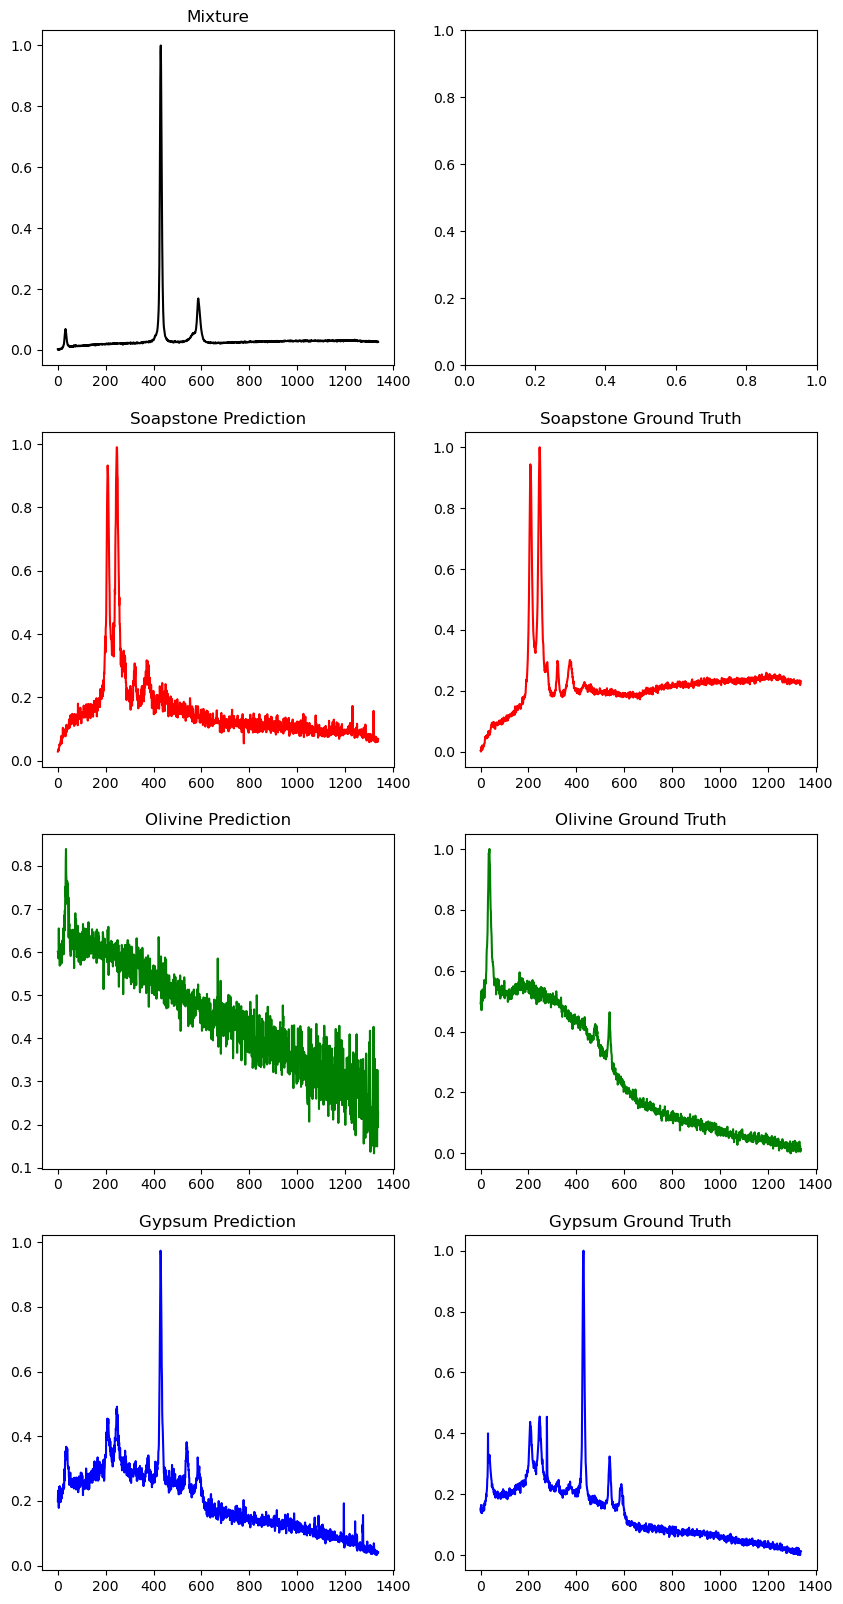

In [65]:
subplot_spectra(mixture_test_data, soapstone_predict, olivine_predict, gypsum_predict)

In [66]:
def test_SENN(model, val_data, criterions, comment):
    PRINT_TEMPLATE = '\ttest loss: {:.4f}/{:.4f}/{:.4f} (soapstone/olivine/gypsum); ' +\
                     'test similarity: {:.4f}/{:.4f}/{:.4f} (soapstone/olivine/gypsum)'
    soapstone_test_loss = 0
    olivine_test_loss = 0
    gypsum_test_loss = 0
    soapstone_test_similarity = torch.tensor(0.0, device=device)
    olivine_test_similarity = torch.tensor(0.0, device=device)
    gypsum_test_similarity = torch.tensor(0.0, device=device)
    test_set_length = 0
    with torch.no_grad():
        for i in range(val_data.shape[2]):
            mixture = torch.from_numpy(val_data[0, :, i]).float().unsqueeze(0).unsqueeze(0).to(device)
            soapstone = torch.from_numpy(val_data[1, :, i]).float().to(device)
            olivine = torch.from_numpy(val_data[2, :, i]).float().to(device)
            gypsum = torch.from_numpy(val_data[3, :, i]).float().to(device)

            pred_soapstone = model[1](model[0](mixture))
            pred_olivine = model[2](model[0](mixture))
            pred_gypsum = model[3](model[0](mixture))
            soapstone_loss = criterions[0](pred_soapstone.squeeze(1), soapstone.unsqueeze(0))
            olivine_loss = criterions[1](pred_olivine.squeeze(1), olivine.unsqueeze(0))
            gypsum_loss = criterions[2](pred_gypsum.squeeze(1), gypsum.unsqueeze(0))
            soapstone_test_loss += soapstone_loss
            olivine_test_loss += olivine_loss
            gypsum_test_loss += gypsum_loss
            soapstone_similarity = comment(pred_soapstone.squeeze(1), soapstone)
            olivine_similarity = comment(pred_olivine.squeeze(1), olivine)
            gypsum_similarity = comment(pred_gypsum.squeeze(1), gypsum)
            soapstone_test_similarity += torch.abs(torch.sum(soapstone_similarity)).item()
            olivine_test_similarity += torch.abs(torch.sum(olivine_similarity)).item()
            gypsum_test_similarity += torch.abs(torch.sum(gypsum_similarity)).item()
            test_set_length += 1
        soapstone_average_simi_test = soapstone_test_similarity / test_set_length
        olivine_average_simi_test = olivine_test_similarity / test_set_length
        gypsum_average_simi_test = gypsum_test_similarity / test_set_length
        print(PRINT_TEMPLATE.format(soapstone_test_loss, olivine_test_loss, gypsum_test_loss,
                                    soapstone_average_simi_test, olivine_average_simi_test, gypsum_average_simi_test))
        return {'soapstone_simi': soapstone_average_simi_test,
                'olivine_simi': olivine_average_simi_test,
                'gypsum_simi': gypsum_average_simi_test,
                'soapstone_loss': soapstone_test_loss,
                'olivine_loss': olivine_test_loss,
                'gypsum_loss': gypsum_test_loss}

In [67]:
trained_model = tape['model']
val_tape = test_SENN(trained_model, val_data, criterions, comment)

	test loss: 1.0472/4.2776/0.6086 (soapstone/olivine/gypsum); test similarity: 0.9618/0.9574/0.9811 (soapstone/olivine/gypsum)
